# Título: Análise da infecção por Covid - 19 da cidade de São Bernardo do Campo

## Objetivo:

O objetivo do projeto é obter maior entendimento da situação da pandemia da Covid 19, para a cidade de São bernardo do Campo e a pergunta que desejo reponder é como se desenvolveu o tempo entre as mortes durante a pandemia? Foi alto? Foi baixo? Houve ocasiões com o período entre mortes muito baixo? E outras perguntas pertinentes relacionadas à informação tempo entre mortes.

## Bases de Dados:

A base foi adquirida no site do govero brasileiro: https://brasil.io/dataset/covid19/caso/?search=&date=&state=&city=S%C3%A3o+Bernardo+do+Campo&place_type=&is_last=&city_ibge_code=&order_for_place=.

E está sendo armazenado no google drive: https://drive.google.com/file/d/1eEc3zUaHIWWOeEwnIEIAEWLtJNxaNIZT/view?usp=sharing.


Abaixo a um exemplo da base de dados, organizada em forma de tabela e com apenas 5 registros, pois o comando 'head()' foi utilizado.

In [1]:
import pandas as pd
codigo = '1eEc3zUaHIWWOeEwnIEIAEWLtJNxaNIZT'
file = "https://drive.google.com/u/3/uc?id=" + codigo + '&export=download'
df = pd.read_csv(file)
df.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-28,SP,São Bernardo do Campo,city,29316,1031,True,844483,3548708,3471.47308,0.0352
1,2020-11-27,SP,São Bernardo do Campo,city,29207,1029,False,844483,3548708,3458.56577,0.0352
2,2020-11-26,SP,São Bernardo do Campo,city,29121,1028,False,844483,3548708,3448.38203,0.0353
3,2020-11-25,SP,São Bernardo do Campo,city,29007,1024,False,844483,3548708,3434.88264,0.0353
4,2020-11-24,SP,São Bernardo do Campo,city,28832,1021,False,844483,3548708,3414.15991,0.0354


Abaixo está uma lista com todas as colunas da base de dados, obtidas por meio o comando 'columns':

In [2]:
for a in df.columns:
  print(a)
bd = df[['date', 'confirmed', 'deaths', 'estimated_population', 'confirmed_per_100k_inhabitants', 'death_rate']].copy()

date
state
city
place_type
confirmed
deaths
is_last
estimated_population
city_ibge_code
confirmed_per_100k_inhabitants
death_rate


As colunas mais relevantes para nosso estudo estão a seguir:

**date** (data): data em que as informações foram registradas.

**confirmed** (confirmados): número de casos confirmados de covid-19 até o momento.

**deaths** (mortes): número de mortes apuradas por covid-19 até o momento.

**estimated_population** (população estimada): poupulação estimada da cidade de São Bernardo do Campo.

**confirmed_per_100k_inhabitants** (número de casos confirmados para cada 100 mil habitantes): Valor de casos confirmados para cada cem mil habitantes, dado descoberto por meio da divisão do número de casos confirmados pela população estimada e após isso a multiplicação por 100 mil.

**death_rate** (taxa de morte): taxa de morte, razão do número de mortes pelo número de casos confirmados.

In [3]:
df.shape

(238, 11)

Acima podemos ver o tamanho da tabela, ela possui 11 colunas e 238 registros.

E abaixo utilizamos o comando 'info()' para encontrar o número de dados que cada coluna possui, bem como o tipo do dado, por exemplo a coluna de índice 3, estimated_population, possui 238 dados do tipo int64, ou seja, são números inteiros.



In [4]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            238 non-null    object 
 1   confirmed                       238 non-null    int64  
 2   deaths                          238 non-null    int64  
 3   estimated_population            238 non-null    int64  
 4   confirmed_per_100k_inhabitants  238 non-null    float64
 5   death_rate                      238 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 11.3+ KB


## Manipulação de Dados:
Ideias: mortes por hora e a relação entre feriados e o crescimento de casos


**1 - Criação da coluna 'Mes'**

In [5]:
for a in range(bd.shape[0]):
  bd.loc[a, 'Mes'] = int(bd['date'][a][5:7])

O código acima foi feito utilizando o comando de repetição 'for' e o comando 'loc[]', que é responsável por adicionar valores em uma coluna.

**2 - Criação da coluna 'dias_corridos'**

A coluna 'dias_corridos' será utilizada na criação das próximas colunas e ela nos dará a informação de quantos dias se passaram entre o início da base de dados até hoje.

Nela foram utilizados os comandos 'date()' e 'timedelta()', afim de organizar e aumentar os dias e o comando de repetição 'while' com condição 'True', algo que cria um loop infinito, quebrado pelo comando 'break' dentro de um comando de seleção 'if'.

In [6]:
from datetime import date, timedelta
primdia = date(int(bd['date'][bd.shape[0]-1][:4]),int(bd['date'][bd.shape[0]-1][5:7]),int(bd['date'][bd.shape[0]-1][8:]))
ultdia = date(int(bd['date'][0][:4]),int(bd['date'][0][5:7]),int(bd['date'][0][8:]))
dias = primdia
num = 0
for a in range(bd.shape[0]-1,-1,-1):
  adata = date(int(bd['date'][a][:4]),int(bd['date'][a][5:7]),int(bd['date'][a][8:]))
  while True:
    if adata == dias + timedelta(days = num):
      bd.loc[a, 'dias_corridos'] = num +1
      break
    num += 1
print('Dias corridos desde o início da pandemia:', bd.dias_corridos[0], '. Considerando o dia', bd.date[0], 'como o último dia.')

Dias corridos desde o início da pandemia: 258.0 . Considerando o dia 2020-11-28 como o último dia.


**3 - Criação das colunas 'mortes_por_hora' e 'tempo_por_morte'**

Essas colunas serão utilizadas para descobrimos o tempo que leva para uma morte, devido à covid 19, ocorrer na cidade de São Bernardo do Campo.

In [7]:
for a in range(bd.confirmed.count()-1, -1, -1):
  if a != bd.confirmed.count() - 1:
    mortes = 0
    dias_corridos = 0
    for b in range(bd.deaths.count()-2,a,-1):
      if bd.deaths[b] > bd.deaths[b+1]:
        mortes = bd.deaths[b]
        dias_corridos = bd.dias_corridos[b]

    bd.loc[a,'mortes_por_hora'] = (bd.loc[a,'deaths'] - mortes)  / (bd.loc[a,'dias_corridos'] - dias_corridos) / 24
    if bd.loc[a,'mortes_por_hora'] != 0:
      bd.loc[a,'tempo_por_morte'] = round(1 / bd.loc[a,'mortes_por_hora'],2) 
  else:
    bd.loc[a,'mortes_por_hora'] = 0

Além dos comandos já explicados anteriormente, o código acima foi feito utilizando estruturas de seleção 'if' e 'else' de forma simplificada. E uma alteração teve de ser feita no valor do 'tempo_por_morte', o que mudou seu valor de infinito para 'NaN' em alguns registros, pois no caso de o valor de 'mortes_por_hora' ser nulo o valor de 'tempo_por_morte' será infinito, ou seja, não ouve mortes dentro daquele período.

E o problema está em justamente os valores serem infinitos, pois alteram as medidas de tendência Central e dispersão, logo consideramos os valores como nulos


**4 - Visualização da tabela com suas novas colunas**

A tabela abaixo está reduzida e com registros espaçados, o que pode ser verificado na esquerda da tabela pelos índices. Tal alteração foi feita para ampliar o entendimento das novas colunas, por meio de mais dados.

In [8]:
bd[::10]

,date,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,Mes,dias_corridos,mortes_por_hora,tempo_por_morte
0,2020-11-28,29316,1031,844483,3471.47308,0.0352,11.0,258.0,0.083333,12.00
10,2020-11-17,28018,1002,844483,3317.76957,0.0358,11.0,247.0,0.033333,30.00
20,2020-11-03,26868,983,844483,3181.59158,0.0366,11.0,233.0,0.000000,NaN
30,2020-10-23,26257,973,844483,3109.23962,0.0371,10.0,222.0,0.166667,6.00
40,2020-10-10,25374,943,844483,3004.67860,0.0372,10.0,209.0,0.166667,6.00
50,2020-09-27,24542,904,844483,2906.15678,0.0368,9.0,196.0,0.000000,NaN
60,2020-09-17,23795,855,844483,2817.70030,0.0359,9.0,186.0,0.083333,12.00
70,2020-09-06,22908,807,844483,2712.66562,0.0352,9.0,175.0,0.041667,24.00
80,2020-08-26,21039,756,844483,2491.34678,0.0359,8.0,164.0,-0.041667,-24.00
90,2020-08-16,19601,711,844483,2321.06508,0.0363,8.0,154.0,0.708333,1.41


## Resultados Estatísticos:
Descrever e implementar os resultados obtidos, principalmente incluindo gráficos.



**1 - Medidas de Tendência Central e Dispersão de ambas colunas criadas**

In [9]:
bd[['mortes_por_hora', 'tempo_por_morte']].describe()

,mortes_por_hora,tempo_por_morte
count,238.000000,180.000000
mean,0.158021,13.319111
std,0.188505,28.917867
min,-0.083333,-24.000000
25%,0.000694,3.000000
50%,0.083333,6.000000
75%,0.250000,16.000000
max,0.958333,360.000000


Acima o comando 'describe()' foi utilizado para encontrarmos a média, mediana e desvio padrão para cada uma das colunas e é possível notar algumas incoerências nos resultados, pois o valor mínimo de ambas as colunas é negativo, algo que não poderia ser possível, pois o tempo mínimo entre mortes deve ser um número positivo, afinal, não há tempo negativo.

Além disso, a contagem da coluna 'tempo_por morte' é 181 sendo que deveria ser 238, isso ocorre, pois alteramos a coluna 'tempo_por_morte', transformando todo valor inf de infinito em 'NaN'. 

Vamos focar na coluna 'tempo_por_morte', pois ela é mais simples de se interpretar.

A média dos tempos por morte de todos os registros é de 13.31, ou seja, as mortes ocorreram, na teoria com todas espaçadas perfeitamente, aproximadamente, uma vez a cada 13 horas e 18 minutos.

A mediana da coluna 'tempo_por_morte' é representada pela linha **50%** e tem o valor de 6, ou seja, durante os 257 dias de pandemia os valores estão distribuídos por volta do 6 (6 horas entre as mortes) e isso é confirmado pelos dados de **25%** e **75%**, respectivamente, 3 e 16, números próximos do 6 ao considerarmos que o maior valor encontrado é 360.

E por último podemos obter o desvio padrão, que representa o quanto cada dado está afastado da média, no geral. E o desvio padrão para 'tempo_por_morte' é igual a 28.84, ou seja, cada dado da tabela difere da média em algo próximo de 28 horas e 51 minutos, porém isso é um valor generalizado e não corresponde as variações reais em si, pois alguns dados variam menos e outros mais. Além disso o valor do desvio padrão é maior que a média, ou seja, a média menos o desvio padrão dá um valor negativo que é um número estranho para a base de dados em questão.

In [10]:
bd[['tempo_por_morte','mortes_por_hora']].var()

tempo_por_morte    836.243061
mortes_por_hora      0.035534
dtype: float64

Acima se encontra a variância das colunas 'tempo_por_morte' e 'mortes_por_hora'.

A variância é a medida de dispersão que dita de que forma os dados estão distribuídos em relação a média, um valor de variância baixo indica que os dados estão próximos da média e um valor alto indica que os números estão mais distantes da média, o que diminui um pouco o peso do desvio padrão, pois uma variância muito grade pode significar a presença de outliers, que são valores muito pequenos ou muito grandes que fogem do comum em relação ao restante dos dados.

A variância da coluna 'tempo_por_morte' é 831.6, o que é bem grande em relação a sua média 13.31 e significa que os dados talvez não estejam muito bem distribuídos em relação a média, ou que há a presença de alguns outliers.

Abaixo estarão os registros que apresentam valores para coluna 'mortes_por_hora' menores que 0 e os registros próximos deles, a fim de encontrarmos o motivo do erro no valor mínimo da tabela, uma valor negativo.

In [ ]:
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
for a in range(bd.shape[0]-1,-1,-1):
  if bd['mortes_por_hora'][a] < 0:
    print(bd[['date', 'confirmed', 'deaths', 'dias_corridos','mortes_por_hora', 'tempo_por_morte']][a+3:a-4:-1])
    print()
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

          date  confirmed  deaths  dias_corridos  mortes_por_hora  tempo_por_morte
96  2020-08-10      18291     676          148.0         0.000000              NaN
95  2020-08-11      18511     689          149.0         0.270833             3.69
94  2020-08-12      18855     691          150.0         0.083333            12.00
93  2020-08-13      19134     689          151.0        -0.083333           -12.00
92  2020-08-14      19356     691          152.0         0.000000              NaN
91  2020-08-15      19549     694          153.0         0.125000             8.00
90  2020-08-16      19601     711          154.0         0.708333             1.41

          date  confirmed  deaths  dias_corridos  mortes_por_hora  tempo_por_morte
83  2020-08-23      20644     739          161.0         0.041667            24.00
82  2020-08-24      20687     739          162.0         0.000000              NaN
81  2020-08-25      20869     757          163.0         0.375000             2.67
80 

Analisando as tabelas acima, podemos observar que os valores da coluna 'mortes_por_hora' só vieram negativos, pois houve um problema na coluna 'deaths', em ambos os casos o número de mortes da coluna 'deaths' que é cumulativa, diminuiu, ou seja, em duas ocasiões os responsáveis pela base de dados atualizaram as bases com números de morte menores que os corretos, ação que ocasionou tal erro no valor mínimo dos dados.

Acima, além dos comandos já utilizados anteriormente foram utilizados os comandos 'pd.set_option("display.width, quantidade de caracteres")', 'pd.set_option("display.max_columns", None (para mostrar todas as colunas da base de dados))' e os comandos 'pd.reset_option("dispaly.width")' e o 'pd.reset_option("display.max_columns")', que servem para configurar quantas colunas da tabela devem aparecer e o número de caracteres que o print colocará em uma mesma linha, o que permite que mais colunas de um mesmo registro apareçam juntas. Abaixo há um exemplo do que ocorre se não usarmos os comandos para configurar o 'print()'.


In [ ]:
print(bd[['date', 'confirmed', 'deaths', 'dias_corridos','mortes_por_hora', 'tempo_por_morte']].loc[92:94])

          date  confirmed  ...  mortes_por_hora  tempo_por_morte
92  2020-08-14      19356  ...         0.000000              NaN
93  2020-08-13      19134  ...        -0.083333            -12.0
94  2020-08-12      18855  ...         0.083333             12.0

[3 rows x 6 columns]


E por último a moda, que nos dá os valores que aparecem com maior frequência.

In [ ]:
bd[['mortes_por_hora','tempo_por_morte']].mode()

,mortes_por_hora,tempo_por_morte
0,0.0,24.0


De acordo com o comando 'mode()' acima a moda da coluna 'tempo_por_morte' é 24 horas, porém isso não se confirma com os dados encontrados abaixo.

In [ ]:
bd[['deaths','mortes_por_hora','tempo_por_morte']].query('tempo_por_morte == 24').count()

deaths             28
mortes_por_hora    28
tempo_por_morte    28
dtype: int64

In [ ]:
bd[['deaths','mortes_por_hora','tempo_por_morte']].query('tempo_por_morte == 24')[::2]

,deaths,mortes_por_hora,tempo_por_morte
1,1029,0.041667,24.0
25,976,0.041667,24.0
57,870,0.041667,24.0
70,807,0.041667,24.0
100,650,0.041667,24.0
112,594,0.041667,24.0
144,325,0.041667,24.0
152,286,0.041667,24.0
161,233,0.041667,24.0
165,214,0.041667,24.0


In [ ]:
bd[['deaths','mortes_por_hora','tempo_por_morte']].query('tempo_por_morte != 24 & mortes_por_hora == 0.041667')[::2]

,deaths,mortes_por_hora,tempo_por_morte


Acima estão alguns dos 28 registros que possuem 24 horas como valor da coluna 'tempo_por_morte'. E, por meio da última tabela, é possível confirmar que a coluna 'tempo_por_morte' apresenta sempre um valor ligado ao valor da coluna 'mortes_por_hora', pois o 24 só surge, caso o valor 0.041667 também apareça, algo que não ocorreu ao usarmos o 'query()' para procurarmos registros com valor 24 separados do valor 0.041667.

Outro fator interessante é que a coluna 'tempo_por_morte' depende do valor da coluna 'mortes_por_hora' e suas modas, de acordo com o comando 'mode()' são, respectivamente, 24 e 0, porém o valor de 'mortes_por_hora' ligado ao 24 é 0.041667, ou seja, alguma coisa está errada e vamos verificar isso logo abaixo.

In [11]:
bd[['deaths','mortes_por_hora','tempo_por_morte']].query('mortes_por_hora == 0').count()

deaths             58
mortes_por_hora    58
tempo_por_morte     0
dtype: int64

In [12]:
bd[['deaths','mortes_por_hora','tempo_por_morte']].query('mortes_por_hora == 0')[::5]

,deaths,mortes_por_hora,tempo_por_morte
5,1019,0.0,NaN
14,998,0.0,NaN
34,955,0.0,NaN
50,904,0.0,NaN
76,776,0.0,NaN
98,660,0.0,NaN
159,234,0.0,NaN
194,52,0.0,NaN
207,20,0.0,NaN
219,7,0.0,NaN


Acima podemos notar que a moda da coluna 'mortes_por_hora' é 0 com 58 repetições. O que está diferente do esperado é a contagem dos dados da coluna 'tempo_por_morte' que é 0, seus 58 registros faltantes representam o valor 'NaN', o qual não é contabilizado nas contagens de moda e deveria ser inf de infinito, porém foi alterado para não mudar a média, o desvio padrão e a variância, logo devemos considerar que a verdadeira moda da coluna 'tempo_por_morte' ocorre quando o número de 'mortes_por_hora' é 0 com 58 repetições.



Além disso a moda ser 0 ('NaN') é algo provável, pois tanto no início da pandemia como no final o número de mortes terá que ser 0, o que automaticamente torna o 0 um possível candidato para ser a moda da base de dados.

Outras informações interssantes sobre as novas colunas são os dados mínimos e máximos.

In [13]:
bd[bd['tempo_por_morte']==bd['tempo_por_morte'].min()]

,date,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,Mes,dias_corridos,mortes_por_hora,tempo_por_morte
80,2020-08-26,21039,756,844483,2491.34678,0.0359,8.0,164.0,-0.041667,-24.0


In [14]:
bd[bd['mortes_por_hora']==bd['mortes_por_hora'].min()]

,date,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,Mes,dias_corridos,mortes_por_hora,tempo_por_morte
93,2020-08-13,19134,689,844483,2265.76497,0.036,8.0,151.0,-0.083333,-12.0


Informações com valor negativo, tempo menor que 0, portanto erradas.

In [15]:
bd.query('tempo_por_morte >= 0')

,date,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,Mes,dias_corridos,mortes_por_hora,tempo_por_morte
0,2020-11-28,29316,1031,844483,3471.47308,0.0352,11.0,258.0,0.083333,12.0
1,2020-11-27,29207,1029,844483,3458.56577,0.0352,11.0,257.0,0.041667,24.0
2,2020-11-26,29121,1028,844483,3448.38203,0.0353,11.0,256.0,0.166667,6.0
3,2020-11-25,29007,1024,844483,3434.88264,0.0353,11.0,255.0,0.125000,8.0
4,2020-11-24,28832,1021,844483,3414.15991,0.0354,11.0,254.0,0.027778,36.0
...,...,...,...,...,...,...,...,...,...,...
221,2020-04-07,129,6,844483,15.27562,0.0465,4.0,23.0,0.020833,48.0
223,2020-04-05,81,5,844483,9.59167,0.0617,4.0,21.0,0.020833,48.0
225,2020-04-03,70,4,844483,8.28910,0.0571,4.0,19.0,0.041667,24.0
227,2020-04-01,52,2,844483,6.15761,0.0385,4.0,17.0,0.020833,48.0


In [16]:
valor = str(bd['mortes_por_hora'][bd['mortes_por_hora']>=0].min())
bd.query('mortes_por_hora == '+'"'+valor+'"')[::8]

,date,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,Mes,dias_corridos,mortes_por_hora,tempo_por_morte


In [17]:
valor = str(bd['tempo_por_morte'][bd['tempo_por_morte']>=0].min())
bd.query('tempo_por_morte == '+'"'+valor+'"')

,date,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,Mes,dias_corridos,mortes_por_hora,tempo_por_morte


Acima podemos ver alguns dos 58 registros que possuem o valor mínimo positivo para a coluna 'mortes_por_hora' que é 0 e o valor mínimo para a coluna 'tempo_por_morte' é 1.04 horas ou 1 hora e 3 minutos aproximadamente, que é um valor extremamente alto, pois estamos falando de uma vida a cada 63 minutos.

In [18]:
bd[bd['mortes_por_hora']==bd['mortes_por_hora'].max()]

,date,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,Mes,dias_corridos,mortes_por_hora,tempo_por_morte
142,2020-06-25,6775,352,844483,802.266,0.052,6.0,102.0,0.958333,1.04


In [19]:
bd[bd['tempo_por_morte']==bd['tempo_por_morte'].max()]

,date,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,Mes,dias_corridos,mortes_por_hora,tempo_por_morte
229,2020-03-30,33,1,844483,3.90772,0.0303,3.0,15.0,0.002778,360.0


In [20]:
valor = str(bd['mortes_por_hora'][bd['mortes_por_hora']>0].min())
bd.query('mortes_por_hora == '+'"'+valor+'"')

,date,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,Mes,dias_corridos,mortes_por_hora,tempo_por_morte


Acima é possível ver que no início da pandemia, 15 dias após o início da base de dados houve a primeira morte e esse foi o dia com o maior valor 'tempo_por_morte', sendo 360 horas do início dos registros no Brasil até a primeira morte.

Além disso, é possível notar que o maior valor da coluna 'mortes_por_hora', 0.958333, coincide com o menor da coluna 'tempo_por_morte', 1.04. O mesmo ocorre com o contrário, pois o maior valor da coluna 'tempo_por_morte', 360, coincide com o menor, após o 0, da coluna 'mortes_por hora', 0.002778.

**2 - Agrupamento**

In [21]:
a = bd.groupby('tempo_por_morte')['tempo_por_morte'].count()
a

tempo_por_morte
-24.00      1
-12.00      1
 1.04       1
 1.20       1
 1.33       2
 1.41       2
 1.60       2
 1.71       3
 1.85       2
 2.00       4
 2.18       8
 2.40       4
 2.67       8
 3.00       9
 3.43       8
 3.69       2
 4.00       8
 4.80       9
 6.00      17
 6.86       3
 8.00      13
 9.00       1
 9.60       4
 10.29      1
 12.00     18
 16.00      5
 18.00      1
 24.00     28
 30.00      1
 32.00      1
 36.00      2
 48.00      8
 72.00      1
 360.00     1
Name: tempo_por_morte, dtype: int64

In [22]:
a.sort_values(ascending=False).head(10)

tempo_por_morte
24.00    28
12.00    18
6.00     17
8.00     13
4.80      9
3.00      9
4.00      8
2.67      8
48.00     8
3.43      8
Name: tempo_por_morte, dtype: int64

Acima está um agrupamento dos dados da coluna 'tempo_por_morte' e por ela podemos ver os outliers e aonde está a maior concentração dos pontos, o que nos dá a oportunidade de verificar os valores da mediana e os pontos que podemos considerar como outliers: 360, valor bom para manter a mortalidade da pandemia baixa, pois, para o valor máximo, significa que 360 horas se passaram antes de haver qualquer morte pela pandemia ou 360 horas entre uma morte ou outra.



**3 - Correlação**

A seguir temos a correlação entre as colunas da base de dados 'bd', utilizando a biblioteca 'seaborn' e o comando 'heatmap()' conseguimos ver de forma mais clara quais correlações são altas, baixas ou inexistentes por meio das cores. 

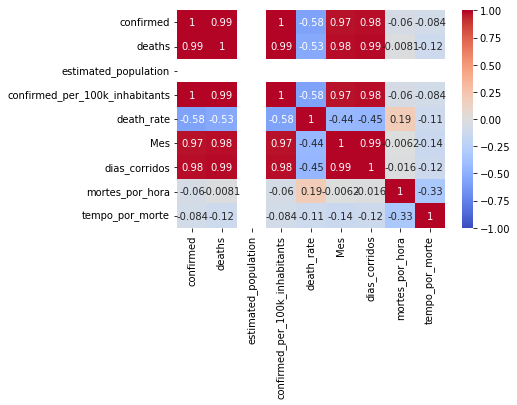

In [23]:
import seaborn as sns

sns.heatmap(bd.corr(),  vmin=-1, vmax=1, center=0, annot = True, cmap= 'coolwarm')

Acima podemos ver que a coluna 'estimated_population' possui correlação inexistente com as outras colunas e isso ocorre, pois seus valores são constantes, ou seja, mesmo que as outras colunas subam ou desçam, ela não vai se alterar, além dessa, a menor correlação existente ocorre entre as colunas 'deaths' e 'mortes_por_hora', o que de início é estranho, pois a segunda depende da primeira, porém a coluna 'mortes_por_hora' é calculada, por meio da diferença entre os registros da coluna 'deaths' dividida pela diferença multiplicada por 24 da coluna 'dias_corridos', ou seja, mesmo que a coluna 'deaths' aumente de valor, o que vai importar é o quanto aumentou e não se aumentou ou não, logo a correção entre as duas colunas é de -0.0081, baixa, bem como a correlação das colunas 'mortes_por_hora' com a coluna 'dias_corridos' que é a segunda mais baixa com - 0.016.

**4 - Estruturas de repetição e seleção**

Além do que já foi utilizado de estruturas de repetição e seleção nos tópicos acima, abaixo há uma célula interativa, que nos trará algumas informações sobre o tempo entre mortes geral da pandemia, ou seja, o tempo entre uma morte e outra ao contabilizarmos toda a pandemia ou alguns meses.

Abaixo também há a função 'nomemes(mes)' que identifica o nome do mês em relação ao seu número entre 1 e 12.

In [24]:
def nomemes(x):
  lista = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
  return lista[x-1]

In [25]:
escolha = 4
while escolha != 0:
  escolha = 4
  while escolha not in [1,2,3,0]:
    escolha = int(input('Escolha uma opção:\n1 - Tempo entre Mortes geral da pandemia, do início ao momento atual\n2 - Tempo entre Mortes Mensal\n3 - Tempo entre Mortes em Períodos Mensais\n0 - Sair do Programa\nEscolha: '))
  if escolha == 1:
    x = bd.deaths.max()-bd.deaths.min()
    y = bd.dias_corridos.max()*24
    z = x / y
    w = 1/z
    print()
    print(f'O tempo entre mortes da pandemia como um todo é {w:.2f}.\nOu seja, em média, a cada {w // 1:.0f} horas e {w % 1 * 60:.0f} minutos ocorreu uma morte em São Bernardo do Campo devido ao Covid 19.')
    print()
  elif escolha == 2:
    print()
    mes = int(input(f'Escolha um mês entre {bd.Mes.min()} e {bd.Mes.max()}: '))
    bdmes = bd[bd.Mes == mes]
    mortes_mes = bdmes['deaths'].max() - bdmes['deaths'].min()
    dias_mes = bdmes['dias_corridos'].max() - bdmes['dias_corridos'].min() + 1
    mortes_hora = mortes_mes/dias_mes/24
    horas_morte = 1/ mortes_hora
    print(f'\nO tempo entre mortes da pandemia para o mês de {nomemes(mes)} é {horas_morte:.2f}.\nOu seja, em média, no mês de {nomemes(mes)} a cada {horas_morte // 1:.0f} horas e {horas_morte % 1 * 60:.0f} minutos ocorreu uma morte em São Bernardo do Campo devido ao Covid 19.')
    print()
  elif escolha == 3:
      mes1 = int(input(f'\nEscolha um mês entre {bd.Mes.min()} e {bd.Mes.max()}: '))
      mes2 = int(input(f'Escolha outro mês entre {bd.Mes.min()} e {bd.Mes.max()}: '))
      while mes2 == mes1:
        mes2 = int(input(f'Escolha outro mês entre {bd.Mes.min()} e {bd.Mes.max()}: '))
      if mes1 > mes2:
        mestroca = mes1
        mes1 = mes2
        mes2 = mestroca
      bdmes1 = bd[bd.Mes == mes1]
      bdmes2 = bd[bd.Mes == mes2]
      print()
      mortes_mes = bdmes2['deaths'].max() - bdmes1['deaths'].min()
      dias_mes = bdmes2['dias_corridos'].max() - bdmes1['dias_corridos'].min() + 1
      mortes_hora = mortes_mes/dias_mes/24
      horas_morte = 1/ mortes_hora
      print(f'O tempo entre mortes da pandemia no perído de {nomemes(mes1)} a {nomemes(mes2)} é {horas_morte:.2f}.\nOu seja, em média, a cada {horas_morte // 1:.0f} horas e {horas_morte % 1 * 60:.0f} minutos ocorreu uma morte em São Bernardo do Campo devido ao Covid 19.')
      print()
print('----- PROGRAMA ENCERRADO -----')

Escolha uma opção:
1 - Tempo entre Mortes geral da pandemia, do início ao momento atual
2 - Tempo entre Mortes Mensal
3 - Tempo entre Mortes em Períodos Mensais
0 - Sair do Programa
Escolha: 1

O tempo entre mortes da pandemia como um todo é 6.01.
Ou seja, em média, a cada 6 horas e 0 minutos ocorreu uma morte em São Bernardo do Campo devido ao Covid 19.

Escolha uma opção:
1 - Tempo entre Mortes geral da pandemia, do início ao momento atual
2 - Tempo entre Mortes Mensal
3 - Tempo entre Mortes em Períodos Mensais
0 - Sair do Programa
Escolha: 2

Escolha um mês entre 3.0 e 11.0: 8

O tempo entre mortes da pandemia para o mês de Agosto é 4.96.
Ou seja, em média, no mês de Agosto a cada 4 horas e 58 minutos ocorreu uma morte em São Bernardo do Campo devido ao Covid 19.

Escolha uma opção:
1 - Tempo entre Mortes geral da pandemia, do início ao momento atual
2 - Tempo entre Mortes Mensal
3 - Tempo entre Mortes em Períodos Mensais
0 - Sair do Programa
Escolha: 3

Escolha um mês entre 3.0 e 1

Na célula interativa acima é possível obter, de maneira simples, dados semelhantes aos da coluna 'tempo_por_morte', com a diferença de ser em períodos maiores. Esse código foi feito utilizando estruturas de repetição 'while', bem como estruturas de seleção 'if' e 'elif', o 'while' foi utilizado para manter o programa funcionando até a seleção da opção de número 0, e as ferramentas de seleção foram utilizadas para selecionar as ações que deveriam ser feitas, conforme a opção selecionada no Menu mantido pelo 'While'.

**5 - Gráficos**

Abaixo veremos alguns gráficos para facilitarmos a visualização do que foi apresentado até agora.


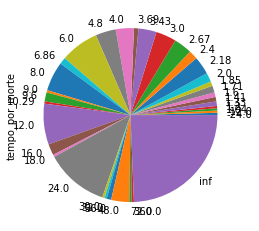

In [26]:
bdtmor = bd[['tempo_por_morte','mortes_por_hora']].copy()
bdtmor['tempo_por_morte'] = round(1/bdtmor['mortes_por_hora'],2)
bdtmorg = bdtmor.groupby('tempo_por_morte')['tempo_por_morte'].count()
bdtmorg.plot(kind='pie')

Aqui temos um gráfico do tipo pizza, que possui muitos dados diferentes, logo a visibilidade da torta piora, porém é possível localizar os maiores valores: inf, 24, 12, 6 e 8.

Ele foi feito com os comandos 'base_de_dados.plot(kind="pie")', 'groupby()', 'count()' e 'round()', que servem para, respectivamente, plotar um gráfico de setores, agrupar informações, contar registros e arredondar números.

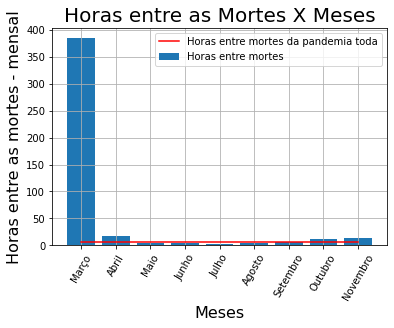

In [28]:
import matplotlib.pyplot as plt
listax = []
listay = []
listaxnome = []
x = bd.deaths.max()-bd.deaths.min()
y = bd.dias_corridos.max()*24
z = x / y
w = 1/z
for a in range(int(bd.Mes.min()),int(bd.Mes.max()+1)):
  mes = a
  bdbarras = bd[bd.Mes == mes].copy()
  mortes_mes = bdbarras['deaths'].max() - bdbarras['deaths'].min()
  dias_mes = bdbarras['dias_corridos'].max() - bdbarras['dias_corridos'].min() + 1
  mortes_hora = mortes_mes/(dias_mes*24)
  horas_morte = 1/ mortes_hora
  listax.append(a)
  listaxnome.append(nomemes(a))
  listay.append(horas_morte)
plt.grid()
plt.xticks(listax, listaxnome, rotation = 60)
plt.xlabel('Meses',fontsize=16)
plt.ylabel('Horas entre as mortes - mensal',fontsize=16)
plt.title('Horas entre as Mortes X Meses',fontsize=20)
plt.bar(listax,listay,label = 'Horas entre mortes')
plt.plot([3,11],[w,w],color='red',label='Horas entre mortes da pandemia toda')
plt.legend(loc='upper right')

O gráfico acima nos traz as informações mensais de quanto tempo, em horas, se passa entre cada morte dentro de um mês. Seus dados são iguais aos descobertos no programa interativo, a linha vermelha é o valor de horas entre mortes para a pandemia em um todo, encontrado na primeira opção da célula interativa, já as barras em azul se igualam aos resultados da segunda opção, só que ao invés de ter que visualizar dado por dado, digitando o mês desejado, podemos obter tudo de uma única vez.

No gráfico podemos ver como o tempo entre mortes se comportou mês a mês e por ele podemos confirmar algo que já foi verificado no projeto em grupo sobre o pior momento da pandemia até agora, que foi em julho, pois nele o tempo entre as mortes é menor, ou seja, mais mortes em menos tempo. Após julho verificamos um aumento no tempo, o que indica uma melhorá na situação, ao menos no tocante tratamento da doença, evitando assim mais mortes.

E o outlier do gráfico é o mês de Março e isso ocorre, pois o mês de Março é o início da pandemia e nas duas semanas do mês (os registros da base de dados começaram no dia 16-03-2020) presentes na base de dados poucas mortes ocorreram, logo o valor do tempo entre mortes ficou muito alto.

Ele foi feito por meio dos comandos 'plt.bar()', 'plt.grid()', 'plt.xticks()', 'plt.xlabel()', 'plt.ylabel()', 'plt.title()' e 'plt.legend()' da biblioteca 'matplotlib.pyplot' e servem para plotar e configurar o gráfico.


## Trabalhos Futuros:

Acredito que a parte de gráficos poderia ser melhor trabalhada, pois o gráfico de setor está com muitos dados e isso dificultou sua visualização, portanto gostaria de melhorá - lo, de forma que os dados que possuíssem apenas uma ocorrência aparecessem juntos em um setor chamado 'outros'.

## Conclusão

Em conclusão, o projeto conseguiu atender as expectativas, pois foi possível entender a situação do tempo entre mortes durante a pandemia, descobrimos que a maioria dos dados estão situados na faixa de 24 horas ou menos de tempo, uma faixa de dados que pode ser considerada o final dos valores médios e o início dos valores baixos, afinal uma pessoa falecer ao dia na cidade de São Bernardo do Campo com uma população um pouco maior que 800 mil habitantes pode ser considerado um valor baixo, porém se extrapolarmos isso para os dias em que mais de 1 pessoa morrer por dia, ou para o estado de São Paulo ou para o Brasil todo, os dados podem se tornar alarmantes.

Além disso, descobrimos que houveram muitos dias, nos quais o tempo foi caracterizado como 'inf' de infinito, pois naquele período/registro não houve caso de mortes, logo esse valor se tornou a moda, também foi possível verificar que o tempo entre mortes de toda pandemia do início até hoje foi de 6 horas aproximadamente e que a pandemia teve seu valor mais baixo no mês de julho e que a partir daí seu período de tempo entre mortes começou a melhorar, ou seja, aumentar.

Concluindo, o projeto foi um sucesso e informações interessantes foram extraídas por meio dele, obviamente há o que melhorar, mas com o que descobrimos aqui, será possível entender melhor a trajetória que a Covid 19 traçou e ainda irá traçar na cidade de São Bernardo do Campo.

## Referências utilizadas

1 - (brasil.io) "COVID-19": boletins informativos e casos do coronavírus por município por dia. 
Disponível em: https://brasil.io/dataset/covid19/caso/.
Acesso em: 28 nov. 2020.